In [1]:
from twoboxCol import *
import pickle
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
def twoboxColGenerate(parameters, sample_length, sample_number):
    #datestring = datetime.strftime(datetime.now(), '%Y-%m-%d-%H-%M-%S')
    datestring = datetime.strftime(datetime.now(), '%m%d%Y(%H%M)')   # current time used to set file name


    print("\nSet the parameters of the model... \n")
    ### Set all related parameters
    discount = 0.99  # temporal discount , used to solve the MDP with value iteration

    nq = 5  # number of belief states per box
    nr = 2  # number of reward states
    nl = 3  # number of location states
    na = 5
    
#     beta = parameters[0]
#     gamma1 = parameters[1]
#     gamma2 = parameters[2]
#     delta =  parameters[3]
#     direct = parameters[4]
#     epsilon1 = parameters[5]
#     epsilon2 = parameters[6]
#     rho = parameters[7]
#     # State rewards
#     Reward = 1 
#     groom = parameters[8]
#     # Action costs
#     travelCost = parameters[9]
#     pushButtonCost = parameters[10]
    
    beta = 0     # available food dropped back into box after button press
    gamma1 = parameters[0]   # reward becomes available in box 1
    gamma2 = parameters[1]   # reward becomes available in box 2
    delta = 0    # animal trips, doesn't go to target location
    direct = 0   # animal goes right to target, skipping location 0
    epsilon1 = parameters[2] # available food disappears from box 1
    epsilon2 = parameters[3] # available food disappears from box 2
    rho = 1      # food in mouth is consumed
    # State rewards
    Reward = 1   # reward per time step with food in mouth
    groom = parameters[4]     # location 0 reward
    # Action costs
    travelCost = parameters[5]
    pushButtonCost = parameters[6]
        
    NumCol = np.rint(parameters[7]).astype(int)   # number of colors
    Ncol = NumCol - 1  # max value of color
    qmin = parameters[8]
    qmax = parameters[9]
    
    #parameters = [gamma1, gamma2, epsilon1, epsilon2,
    #              groom, travelCost, pushButtonCost, NumCol, qmin, qmax]

    ### Solving the MDP problem with given parameters

    print("Solving the belief MDP...")
    twoboxCol = twoboxColMDP(discount, nq, nr, na, nl, parameters)
    twoboxCol.setupMDP()
    twoboxCol.solveMDP_sfm(initial_value = 0)

    fig  = plt.figure(figsize = (20, 2))
    ax = fig.add_subplot(111)
    policyfig =  ax.imshow(twoboxCol.softpolicy)
    fig.colorbar(policyfig)
    plt.show()

    ### Gnerate data"""
    print("Generate data based on the true model...")
    T = sample_length
    N = sample_number
    twoboxColdata = twoboxColMDPdata(discount, nq, nr, na, nl, parameters, T, N)
    twoboxColdata.dataGenerate_sfm(belief1Initial=0, rewInitial=0, belief2Initial=0, locationInitial=0)
    #twoboxdata.dataGenerate_op(belief1Initial=0, rewInitial=0, belief2Initial=0, locationInitial=0)
    hybrid = twoboxColdata.hybrid
    action = twoboxColdata.action
    location = twoboxColdata.location
    belief1 = twoboxColdata.belief1
    belief2 = twoboxColdata.belief2
    reward = twoboxColdata.reward
    trueState1 = twoboxColdata.trueState1
    trueState2 = twoboxColdata.trueState2
    color1 = twoboxColdata.color1
    color2 = twoboxColdata.color2

    # sampleNum * sampleTime * dim of observations(=3 here, action, reward, location)
    # organize data
    obsN = np.dstack([action, reward, location, color1, color2])  # includes the action and the observable states
    latN = np.dstack([belief1, belief2])
    truthN = np.dstack([trueState1, trueState2])
    #dataN = np.dstack([obsN, latN, truthN])

    return obsN, latN, truthN

In [ ]:
### write data to file
data_dict = {'observations': obsN,
             'beliefs': latN,
             'trueStates': truthN,
             'allData': dataN}
data_output = open(datestring + '_dataN_twobox' + '.pkl', 'wb')
pickle.dump(data_dict, data_output)
data_output.close()

### write all model parameters to file
para_dict = {'discount': discount,
             'nq': nq,
             'nr': nr,
             'nl': nl,
             'na': na,
             'appRate1': gamma1,
             'appRate2': gamma2,
             'disappRate1': epsilon1,
             'disappRate2': epsilon2,
             'reward': 1,
             'groom': groom,
             'travelCost': travelCost,
             'pushButtonCost': pushButtonCost,
             'colorNum': NumCol,
             'qmin':qmin,
             'qmax':qmax
             }
para_output = open(datestring + '_para_twoboxCol' + '.pkl', 'wb')
pickle.dump(para_dict, para_output)
para_output.close()

pkl_file1 = open(datestring + '_para_twoboxCol' + '.pkl', 'rb')
para_pkl = pickle.load(pkl_file1)
pkl_file1.close()

print('Data stored in files' )

In [3]:
#parameters = [gamma1, gamma2, epsilon1, epsilon2,
#              groom, travelCost, pushButtonCost, NumCol, qmin, qmax]
NumCol = 5
parameters = [0.1, 0.1, 0.01, 0.01, 
              0.05, 0.2, 0.3, NumCol, 0.4, 0.6]
Ncol = NumCol - 1

In [4]:
sampleTime = 500

In [5]:
discount = 0.99 

nq = 5  # number of belief states per box
nr = 2  # number of reward states
nl = 3  # number of location states
na = 5


Set the parameters of the model... 

Solving the belief MDP...


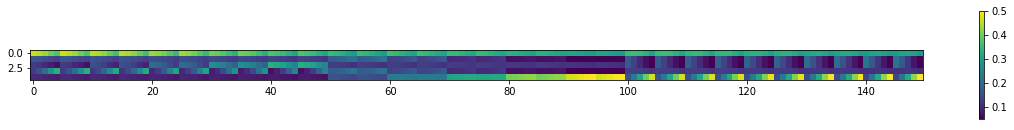

Generate data based on the true model...


In [6]:
obsN, latN, truthN = twoboxColGenerate(parameters, sampleTime, sample_number = 1)

In [ ]:
#obsN = np.dstack([action, reward, location, color1, color2])  # includes the action and the observable states
#latN = np.dstack([belief1, belief2])
#truthN = np.dstack([trueState1, trueState2])

In [7]:
trueState1 = truthN[0, :, 0]
trueState2 = truthN[0, :, 1]

action = obsN[0, :, 0]
reward = obsN[0, :, 1]
location = obsN[0, :, 2]
color1 = obsN[0, :, 3]
color2 = obsN[0, :, 4]

belief1 = latN[0, :, 0]
belief2 = latN[0, :, 1]

In [8]:
showtime = 50
showtime_start = 200

In [9]:
data_true1 = trueState1[showtime_start : showtime_start+showtime]
data_true2 = trueState2[showtime_start : showtime_start+showtime]
data_action = action[showtime_start : showtime_start+showtime]
data_location = location[showtime_start : showtime_start+showtime]
data_reward = reward[showtime_start : showtime_start+showtime]
data_color1 = color1[showtime_start : showtime_start+showtime]
data_color2 = color2[showtime_start : showtime_start+showtime]


data_belief1 = np.reshape((belief1[showtime_start : showtime_start+showtime] + 1/2) / float(nq), showtime)
data_belief2 = np.reshape((belief2[showtime_start : showtime_start+showtime] + 1/2) / float(nq), showtime)
#data_hybrid = np.reshape(hybrid, sampleTime)

actiontemp  = data_action * (1 * (data_action % pb == 0)) / pb
locationtemp = data_location * (1 * (data_location == 2)) + (1 - data_location) * (1 * (data_location != 2))


colormapR1 = (Ncol - data_color1)* 255 / Ncol
colormapG1 = np.zeros(np.shape(data_color1))
colormapB1 = data_color1 * 255 / Ncol
colorimage1 = np.dstack((colormapR1, colormapG1, colormapB1))
colorImageShow1 = np.array(colorimage1, dtype=np.uint8)

colormapR2 = (Ncol - data_color2)* 255 / Ncol
colormapG2 = np.zeros(np.shape(data_color2))
colormapB2 = data_color2 * 255 / Ncol
colorimage2 = np.dstack((colormapR2, colormapG2, colormapB2))
colorImageShow2 = np.array(colorimage2, dtype=np.uint8)


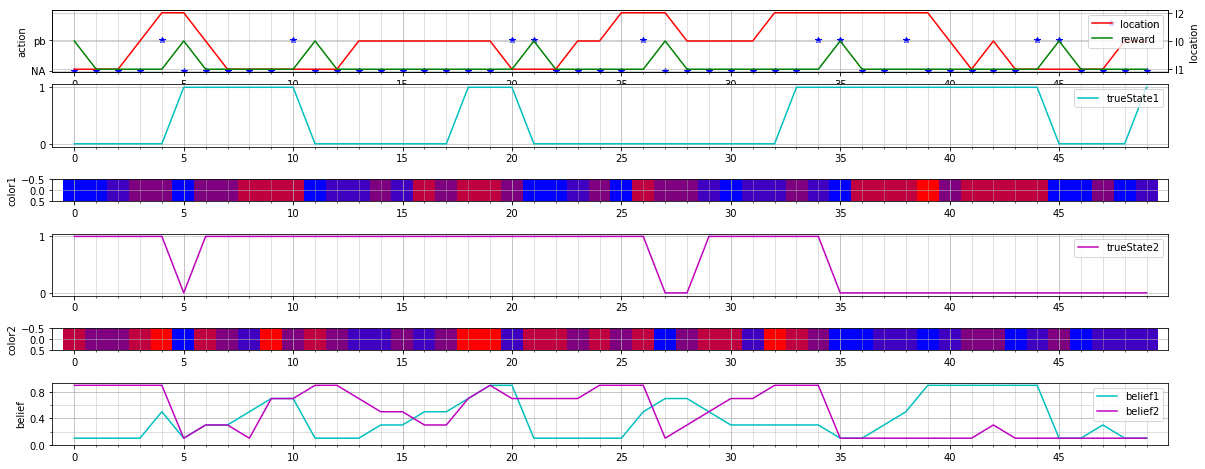

In [10]:
time = np.arange(0, showtime, 1)

fig = plt.figure(figsize = (20, 8))
ax1 = fig.add_subplot(611)
#ax2 = fig.add_subplot(512)
ax3 = fig.add_subplot(612)
ax4 = fig.add_subplot(613)
ax5 = fig.add_subplot(614)
ax6 = fig.add_subplot(615)
ax7 = fig.add_subplot(616)

ax1.plot(time, actiontemp, 'b*', label= 'action')
ax1.legend(loc=1)
ax1.set_xticks(np.arange(0, showtime, 5))
ax1.set_xticks(np.arange(0, showtime, 1), minor = True)
ax1.set_yticks(np.arange(0, 3, 1))
a=ax1.get_yticks().tolist()
a[0]='NA'
a[1] = 'pb'
ax1.set_xlim(-1, showtime)
ax1.set_yticklabels(a)
ax1.set_yticks(ax1.get_yticks()[0:2])
ax1.grid(which = 'minor', alpha = 0.5)
ax1.grid(which = 'major', alpha = 0.7)
ax1.set_ylabel('action')

ax2 = ax1.twinx()
ax2.plot(time, locationtemp, 'r', label= 'location' )
ax2.plot(time, data_reward, 'g', label= 'reward')
ax2.legend(loc=1)
ax2.set_xticks(np.arange(0, showtime, 5))
ax2.set_xticks(np.arange(0, showtime, 1), minor = True)
ax2.set_yticks(np.arange(0, 3, 1))
ax2.set_yticks(ax2.get_yticks()[0:nl])
b=ax2.get_yticks().tolist()
b[0]='l1'
b[1] = 'l0'
b[2] = 'l2'
ax2.set_yticklabels(b)
ax2.grid(which = 'minor', alpha = 0.5)
ax2.grid(which = 'major', alpha = 0.7)
ax2.set_ylabel('location')

ax3.plot(time, data_true1, 'c', label= 'trueState1' )
#ax3.plot(time, data_true2, 'm', label= 'trueState2' )
ax3.legend(loc=1)
ax3.set_xlim(-1, showtime)
ax3.set_xticks(np.arange(0, showtime, 5))
ax3.set_xticks(np.arange(0, showtime, 1), minor = True)
ax3.set_yticks(np.arange(0, 1.2))
ax3.grid(which = 'minor', alpha = 0.5)
ax3.grid(which = 'major', alpha = 0.7)

ax4.imshow(colorImageShow1, interpolation='none')
#ax4.legend(loc=1)
ax4.set_xlim(-1, showtime)
ax4.set_xticks(np.arange(0, showtime, 5))
ax4.set_xticks(np.arange(0, showtime, 1), minor=True)
#ax4.set_yticks(np.arange(0, Ncol + 1))
ax4.grid(which='minor', alpha=0.5)
ax4.grid(which='major', alpha=0.7)
ax4.set_ylabel('color1')

#ax4.plot(time, data_true1, 'c', label= 'trueState1' )
ax5.plot(time, data_true2, 'm', label= 'trueState2' )
ax5.legend(loc=1)
ax5.set_xlim(-1, showtime)
ax5.set_xticks(np.arange(0, showtime, 5))
ax5.set_xticks(np.arange(0, showtime, 1), minor = True)
ax5.set_yticks(np.arange(0, 1.2))
ax5.grid(which = 'minor', alpha = 0.5)
ax5.grid(which = 'major', alpha = 0.7)

ax6.imshow(colorImageShow2, interpolation='none')
#ax6.legend(loc=1)
ax6.set_xlim(-1, showtime)
ax6.set_xticks(np.arange(0, showtime, 5))
ax6.set_xticks(np.arange(0, showtime, 1), minor=True)
#ax6.set_yticks(np.arange(0, Ncol + 1))
ax6.grid(which='minor', alpha=0.5)
ax6.grid(which='major', alpha=0.7)
ax6.set_ylabel('color2')


ax7.plot(time, data_belief1, 'c', label= 'belief1')
ax7.plot(time, data_belief2, 'm', label= 'belief2')
ax7.legend(loc=1)
ax7.set_xlim(-1, showtime)
ax7.set_xticks(np.arange(0, showtime, 5))
ax7.set_xticks(np.arange(0, showtime, 1), minor = True)
ax7.set_yticks(np.arange(0, 1, 2 * 1/ float(nq)))
ax7.set_yticks(np.arange(0, 1, 1/ float(nq)), minor = True)
ax7.grid(which = 'minor', alpha = 0.5)
ax7.grid(which = 'major', alpha = 0.7)
ax7.set_ylabel('belief')

plt.show()

# Check forward-backward algorithm 

In [11]:
from HMMtwoboxCol import *

In [12]:
twoboxCol = twoboxColMDP(0.99, nq, nr, na, nl, parameters)
twoboxCol.setupMDP()
twoboxCol.solveMDP_sfm(initial_value = 0)

In [13]:
obs = obsN[0]
lat = latN[0]

In [14]:
pi = np.ones(nq * nq) / nq / nq
twoColHMM = HMMtwoboxCol(twoboxCol.ThA, twoboxCol.softpolicy, twoboxCol.Trans_hybrid_obs12,
                         twoboxCol.Obs_emis_trans1, twoboxCol.Obs_emis_trans2, pi, NumCol - 1)
alpha, scale = twoColHMM.forward_scale(obs)
beta = twoColHMM.backward_scale(obs, scale)
gamma = twoColHMM.compute_gamma(alpha, beta)
xi = twoColHMM.compute_xi(alpha, beta, obs)

# Contour

# Inference

In [15]:
obs = obsN[0]
lat = latN[0]

In [16]:
#parameters = [gamma1, gamma2, epsilon1, epsilon2,
#              groom, travelCost, pushButtonCost, NumCol, qmin, qmax]
parameters

[0.1, 0.1, 0.01, 0.01, 0.05, 0.2, 0.3, 5, 0.4, 0.6]

In [17]:
gamma1_ini = 0.5
epsilon1_ini = 0.3
gamma2_ini = 0.5
epsilon2_ini = 0.3
groomCost_ini = 0.2
travelCost_ini = 0.1
pushButtonCost_ini = 0.4
NumCol_ini = NumCol
qmin_ini = 0.2
qmax_ini = 0.7

parameters_ini = [gamma1_ini, gamma2_ini, epsilon1_ini, epsilon2_ini,
                  groomCost_ini, pushButtonCost_ini, pushButtonCost_ini,  
                  NumCol_ini, qmin_ini, qmax_ini]
parameters_ini = np.copy(parameters)
parameters_old = np.copy(parameters_ini)

print("The true paramters are:               ", parameters )
print("The initial estimation parameters are:", parameters_ini) 
print ("Now starting with some initialized value of the parameters, we are going to use EM(G) " \
"algorithm for parameter estimation:")

The true paramters are:                [0.1, 0.1, 0.01, 0.01, 0.05, 0.2, 0.3, 5, 0.4, 0.6]
The initial estimation parameters are: [0.1  0.1  0.01 0.01 0.05 0.2  0.3  5.   0.4  0.6 ]
Now starting with some initialized value of the parameters, we are going to use EM(G) algorithm for parameter estimation:


In [18]:
sampleIndex = [0]
NN = len(sampleIndex)

In [26]:
parameters_iniSet = [parameters_ini]
E_MAX_ITER = 300       # 100    # maximum number of iterations of E-step
GD_THRESHOLD = 0.015   # 0.01      # stopping criteria of M-step (gradient descent)
E_EPS = 10 ** -8                  # stopping criteria of E-step
M_LR_INI = 5 * 10 ** -7           # initial learning rate in the gradient descent step
LR_DEC =  5                       # number of times that the learning rate can be reduced

In [27]:
#### EM algorithm for parameter estimation
print("\nEM algorithm begins ...")
# NN denotes multiple data set, and MM denotes multiple initial points
NN_MM_para_old_traj = []

NN_MM_para_new_traj = []
NN_MM_log_likelihoods_old = []
NN_MM_log_likelihoods_new = []
NN_MM_log_likelihoods_com_old = []  # old posterior, old parameters
NN_MM_log_likelihoods_com_new = []  # old posterior, new parameters
NN_MM_latent_entropies = []

NN_likelihoods = []

for nn in range(NN):

    print("\nFor the", sampleIndex[nn] + 1, "-th set of data:")

    ##############################################################
    # Compute likelihood
    lat = latN[sampleIndex[nn]]
    obs = obsN[sampleIndex[nn], :, :]

    MM = len(parameters_iniSet)

    MM_para_old_traj = []
    MM_para_new_traj = []
    MM_log_likelihoods_old = []
    MM_log_likelihoods_new = []
    MM_log_likelihoods_com_old = []  # old posterior, old parameters
    MM_log_likelihoods_com_new = []  # old posterior, new parameters
    MM_latent_entropies = []

    for mm in range(MM):
        parameters_old = np.copy(parameters_iniSet[mm])

        print("\n", mm + 1, "-th initial estimation:", parameters_old)

        itermax = E_MAX_ITER  # 100  # iteration number for the EM algorithm
        eps = E_EPS  # Stopping criteria for E-step in EM algorithm

        para_old_traj = []
        para_new_traj = []

        log_likelihoods_old = []
        log_likelihoods_new = []
        log_likelihoods_com_old = []  # old posterior, old parameters
        log_likelihoods_com_new = []  # old posterior, new parameters
        latent_entropies = []

        count_E = 0
        while count_E < itermax:

            print("\n The", count_E + 1, "-th iteration of the EM(G) algorithm")

            if count_E == 0:
                parameters_old = np.copy(parameters_iniSet[mm])
            else:
                parameters_old = np.copy(parameters_new)  # update parameters

            para_old_traj.append(parameters_old)

            ##########  E-step ##########

            ## Use old parameters to estimate posterior

            # twoboxGra = twoboxMDPder(discount, nq, nr, na, nl, parameters_old, vinitial)
            twoboxColGra = twoboxColMDPder(discount, nq, nr, na, nl, parameters_old)
            ThA_old = twoboxColGra.ThA
            softpolicy_old = twoboxColGra.softpolicy
            Trans_hybrid_obs12_old = twoboxColGra.Trans_hybrid_obs12
            Obs_emis_trans1_old = twoboxColGra.Obs_emis_trans1
            Obs_emis_trans2_old = twoboxColGra.Obs_emis_trans2
            Ncol_old = parameters_old[7].astype(int) - 1
            pi = np.ones(nq * nq) / nq / nq
            twoColHMM = HMMtwoboxCol(ThA_old, softpolicy_old, Trans_hybrid_obs12_old,
                                     Obs_emis_trans1_old, Obs_emis_trans2_old, pi, Ncol_old)

            ## Calculate likelihood of observed and complete date, and entropy of the latent sequence
            complete_likelihood_old = twoColHMM.computeQaux(obs, ThA_old, softpolicy_old, Trans_hybrid_obs12_old)
            latent_entropy = twoColHMM.latent_entr(obs)
            log_likelihood = complete_likelihood_old + latent_entropy

            log_likelihoods_com_old.append(complete_likelihood_old)
            latent_entropies.append(latent_entropy)
            log_likelihoods_old.append(log_likelihood)

            print(parameters_old)
            print(complete_likelihood_old)
            print(log_likelihood)

            ## Check convergence
            if len(log_likelihoods_old) >= 2 and np.abs(log_likelihood - log_likelihoods_old[-2]) < eps:
                print("EM has converged!")
                break

            ##########  M(G)-step ##########
            M_thresh = GD_THRESHOLD
            count_M = 0
            vinitial = 0
            para_new_traj.append([])
            log_likelihoods_com_new.append([])
            log_likelihoods_new.append([])

            learnrate_ini = M_LR_INI
            learnrate = learnrate_ini

            # Start the gradient descent from the old parameters
            parameters_new = np.copy(parameters_old)
            complete_likelihood_new = complete_likelihood_old
            log_likelihood = complete_likelihood_new + latent_entropy

            para_new_traj[count_E].append(parameters_new)
            log_likelihoods_com_new[count_E].append(complete_likelihood_new)
            log_likelihoods_new[count_E].append(log_likelihood)

            print("    M-step")
            print("     ", parameters_new)
            print("     ", complete_likelihood_new)
            print("     ", log_likelihood)

            while True:

                derivative_value = twoboxColGra.dQauxdpara_sim(obs, parameters_new)
                # vinitial is value from previous iteration, this is for computational efficiency
                para_temp = parameters_new + learnrate * np.array(derivative_value)
                #vinitial = derivative_value[-1]  # value iteration starts with value from previous iteration

                ## Check the ECDLL (old posterior, new parameters)
                twoboxCol_new = twoboxColMDP(discount, nq, nr, na, nl, para_temp)
                twoboxCol_new.setupMDP()
                twoboxCol_new.solveMDP_sfm()
                ThA_new = twoboxCol_new.ThA
                softpolicy_new = twoboxCol_new.softpolicy
                Trans_hybrid_obs12_new = twoboxCol_new.Trans_hybrid_obs12
                complete_likelihood_new_temp = twoColHMM.computeQaux(obs, ThA_new,
                                                                     softpolicy_new, Trans_hybrid_obs12_new)

                print("         ", para_temp)
                print("         ", complete_likelihood_new_temp)

                ## Update the parameter if the ECDLL can be improved
                if complete_likelihood_new_temp > complete_likelihood_new + M_thresh:
                    parameters_new = np.copy(para_temp)
                    complete_likelihood_new = complete_likelihood_new_temp
                    log_likelihood = complete_likelihood_new + latent_entropy

                    para_new_traj[count_E].append(parameters_new)
                    log_likelihoods_com_new[count_E].append(complete_likelihood_new)
                    log_likelihoods_new[count_E].append(log_likelihood)

                    print("     ", parameters_new)
                    print("     ", complete_likelihood_new)
                    print("     ", log_likelihood)

                    count_M += 1
                    
                    #if count_M == 10 :
                    #    M_thresh = M_thresh / 4
                else:
                    learnrate /= 2
                    if learnrate < learnrate_ini / (2 ** LR_DEC):
                        break

            count_E += 1

        MM_para_old_traj.append(para_old_traj)  # parameter trajectories for a particular set of data
        MM_para_new_traj.append(para_new_traj)
        MM_log_likelihoods_old.append(log_likelihoods_old)  # likelihood trajectories for a particular set of data
        MM_log_likelihoods_new.append(log_likelihoods_new)
        MM_log_likelihoods_com_old.append(log_likelihoods_com_old)  # old posterior, old parameters
        MM_log_likelihoods_com_new.append(log_likelihoods_com_new)  # old posterior, new parameters
        MM_latent_entropies.append(latent_entropies)

    NN_MM_para_old_traj.append(MM_para_old_traj)  # parameter trajectories for all data
    NN_MM_para_new_traj.append(MM_para_new_traj)
    NN_MM_log_likelihoods_old.append(MM_log_likelihoods_old)  # likelihood trajectories for
    NN_MM_log_likelihoods_new.append(MM_log_likelihoods_new)
    NN_MM_log_likelihoods_com_old.append(MM_log_likelihoods_com_old)  # old posterior, old parameters
    NN_MM_log_likelihoods_com_new.append(MM_log_likelihoods_com_new)  # old posterior, new parameters
    NN_MM_latent_entropies.append(MM_latent_entropies)



EM algorithm begins ...

For the 1 -th set of data:

 1 -th initial estimation: [0.1  0.1  0.01 0.01 0.05 0.2  0.3  5.   0.4  0.6 ]

 The 1 -th iteration of the EM(G) algorithm
[0.1  0.1  0.01 0.01 0.05 0.2  0.3  5.   0.4  0.6 ]
-2413.7193652021315
-1928.8248808185717
    M-step
      [0.1  0.1  0.01 0.01 0.05 0.2  0.3  5.   0.4  0.6 ]
      -2413.7193652021315
      -1928.8248808185717
          [0.10001545 0.1000175  0.01000003 0.01002208 0.04997966 0.20000866
 0.30004923 5.         0.4000779  0.59995914]
          -2413.6963512867433
      [0.10001545 0.1000175  0.01000003 0.01002208 0.04997966 0.20000866
 0.30004923 5.         0.4000779  0.59995914]
      -2413.6963512867433
      -1928.8018669031835
          [9.24652528e-02 9.24694758e-02 2.43478350e-03 2.47869511e-03
 4.23939462e-02 1.92451874e-01 2.92533017e-01 5.00000000e+00
 3.92589924e-01 5.92353002e-01]
          -2418.5320076194794
          [0.09624035 0.09624349 0.00621741 0.00625039 0.0461868  0.19623026
 0.29629112 5.

[0.10007664 0.10008705 0.01000027 0.01011033 0.04989871 0.20004325
 0.30024601 5.         0.40038719 0.59979655]
-2413.7923213689223
-1928.7330026557536
    M-step
      [0.10007664 0.10008705 0.01000027 0.01011033 0.04989871 0.20004325
 0.30024601 5.         0.40038719 0.59979655]
      -2413.7923213689223
      -1928.7330026557536
          [0.10009178 0.10010432 0.0100004  0.01013243 0.04987857 0.2000519
 0.30029517 5.         0.40046386 0.59975616]
          -2413.7698031424284
      [0.10009178 0.10010432 0.0100004  0.01013243 0.04987857 0.2000519
 0.30029517 5.         0.40046386 0.59975616]
      -2413.7698031424284
      -1928.7104844292596
          [9.27574118e-02 9.27721279e-02 2.65121120e-03 2.80513467e-03
 4.25091238e-02 1.92711175e-01 2.92994953e-01 5.00000000e+00
 3.93191191e-01 5.92366251e-01]
          -2418.3644682268355
          [0.0964246  0.09643822 0.0063258  0.00646878 0.04619385 0.19638154
 0.29664506 5.         0.39682753 0.59606121]
          -2415.4036123215

[0.10015174 0.10017294 0.01000107 0.01022087 0.04979841 0.20008645
 0.30049166 5.         0.40076839 0.59959535]
-2413.8628135352274
-1928.6430681836391
    M-step
      [0.10015174 0.10017294 0.01000107 0.01022087 0.04979841 0.20008645
 0.30049166 5.         0.40076839 0.59959535]
      -2413.8628135352274
      -1928.6430681836391
          [0.10016657 0.10018999 0.01000128 0.01024299 0.04977847 0.20009508
 0.30054075 5.         0.40084398 0.59955534]
          -2413.8407394330034
      [0.10016657 0.10018999 0.01000128 0.01024299 0.04977847 0.20009508
 0.30054075 5.         0.40084398 0.59955534]
      -2413.8407394330034
      -1928.6209940814151
          [9.30230827e-02 9.30487569e-02 2.84336166e-03 3.10688757e-03
 4.26003949e-02 1.92945520e-01 2.93431642e-01 5.00000000e+00
 3.93761406e-01 5.92356987e-01]
          -2418.2249414142716
          [0.09659483 0.09661937 0.00642232 0.00667494 0.04618943 0.1965203
 0.29698619 5.         0.39730269 0.59595616]
          -2415.404842016

[0.10022534 0.10025774 0.0100023  0.01033149 0.04969909 0.20012958
 0.30073696 5.         0.40114423 0.59939602]
-2413.9312392016664
-1928.5551087292943
    M-step
      [0.10022534 0.10025774 0.0100023  0.01033149 0.04969909 0.20012958
 0.30073696 5.         0.40114423 0.59939602]
      -2413.9312392016664
      -1928.5551087292943
          [0.10023988 0.10027457 0.0100026  0.01035363 0.04967934 0.20013819
 0.30078597 5.         0.40121877 0.59935638]
          -2413.9095923477466
      [0.10023988 0.10027457 0.0100026  0.01035363 0.04967934 0.20013819
 0.30078597 5.         0.40121877 0.59935638]
      -2413.9095923477466
      -1928.5334618753745
          [9.32797460e-02 9.33167734e-02 3.02841622e-03 3.40118113e-03
 4.26851098e-02 1.93172271e-01 2.93860443e-01 5.00000000e+00
 3.94318798e-01 5.92342045e-01]
          -2418.0958642716514
          [0.09675981 0.09679567 0.00651551 0.0068774  0.04618223 0.19665523
 0.29732321 5.         0.39776879 0.59584921]
          -2415.40784314

[0.10029758 0.10034148 0.01000327 0.01044218 0.04960074 0.20017264
 0.3009819  5.         0.40151532 0.59919834]
-2413.997259655933
-1928.4686477837522
    M-step
      [0.10029758 0.10034148 0.01000327 0.01044218 0.04960074 0.20017264
 0.3009819  5.         0.40151532 0.59919834]
      -2413.997259655933
      -1928.4686477837522
          [0.10031179 0.10035807 0.01000366 0.01046433 0.04958118 0.20018125
 0.30103084 5.         0.40158874 0.5991591 ]
          -2413.976065159144
      [0.10031179 0.10035807 0.01000366 0.01046433 0.04958118 0.20018125
 0.30103084 5.         0.40158874 0.5991591 ]
      -2413.976065159144
      -1928.4474532869635
          [9.35459931e-02 9.35946897e-02 3.22422294e-03 3.70656736e-03
 4.27818074e-02 1.93409976e-01 2.94299905e-01 5.00000000e+00
 3.94882302e-01 5.92339847e-01]
          -2417.9595760545867
          [0.09692889 0.09697638 0.00661394 0.00708545 0.0461815  0.19679561
 0.29766537 5.         0.39823552 0.59574947]
          -2415.406940262326

[0.10036806 0.10042397 0.01000538 0.01055296 0.04950335 0.20021565
 0.30122648 5.         0.40188034 0.5990029 ]
-2414.061057552022
-1928.384080022554
    M-step
      [0.10036806 0.10042397 0.01000538 0.01055296 0.04950335 0.20021565
 0.30122648 5.         0.40188034 0.5990029 ]
      -2414.061057552022
      -1928.384080022554
          [0.10038264 0.10044092 0.01000578 0.01057506 0.04948398 0.20022424
 0.30127536 5.         0.40195394 0.5989635 ]
          -2414.0400802599934
      [0.10038264 0.10044092 0.01000578 0.01057506 0.04948398 0.20022424
 0.30127536 5.         0.40195394 0.5989635 ]
      -2414.0400802599934
      -1928.3631027305255
          [9.37317540e-02 9.37924439e-02 3.34090259e-03 3.93179471e-03
 4.27993364e-02 1.93567495e-01 2.94658888e-01 5.00000000e+00
 3.95362219e-01 5.92258620e-01]
          -2417.8975919411123
          [0.0970572  0.09711668 0.00667334 0.00725343 0.04614166 0.19689587
 0.29796712 5.         0.39865808 0.59561106]
          -2415.428326608165

[0.10043749 0.10050582 0.01000787 0.0106632  0.04940691 0.20025859
 0.30147071 5.         0.4022414  0.59880875]
-2414.1231654529984
-1928.301099935707
    M-step
      [0.10043749 0.10050582 0.01000787 0.0106632  0.04940691 0.20025859
 0.30147071 5.         0.4022414  0.59880875]
      -2414.1231654529984
      -1928.301099935707
          [0.10045116 0.100522   0.01000843 0.01068537 0.04938773 0.20026717
 0.30151952 5.         0.40231285 0.59877021]
          -2414.1027510043436
      [0.10045116 0.100522   0.01000843 0.01068537 0.04938773 0.20026717
 0.30151952 5.         0.40231285 0.59877021]
      -2414.1027510043436
      -1928.2806854870523
          [9.40186059e-02 9.40920231e-02 3.56294884e-03 4.26142387e-03
 4.29225239e-02 1.93829664e-01 2.95122228e-01 5.00000000e+00
 3.95938233e-01 5.92285451e-01]
          -2417.7455549471288
          [0.09723488 0.09730701 0.00678569 0.0074734  0.04615513 0.19704842
 0.29832087 5.         0.39912554 0.59552783]
          -2415.4196188783

[0.1005052  0.10058629 0.01001082 0.01077409 0.0493114  0.20030147
 0.30171459 5.         0.40259653 0.59861683]
-2414.1828031947443
-1928.2196900908564
    M-step
      [0.1005052  0.10058629 0.01001082 0.01077409 0.0493114  0.20030147
 0.30171459 5.         0.40259653 0.59861683]
      -2414.1828031947443
      -1928.2196900908564
          [0.10051856 0.10060224 0.01001147 0.01079628 0.04929241 0.20031004
 0.30176332 5.         0.40266693 0.59857868]
          -2414.162797984732
      [0.10051856 0.10060224 0.01001147 0.01079628 0.04929241 0.20031004
 0.30176332 5.         0.40266693 0.59857868]
      -2414.162797984732
      -1928.1996848808442
          [9.42610211e-02 9.43473557e-02 3.74138835e-03 4.54765446e-03
 4.30027064e-02 1.94047835e-01 2.95541274e-01 5.00000000e+00
 3.96466585e-01 5.92269634e-01]
          -2417.634523678509
          [0.09738979 0.0974748  0.00687643 0.00767197 0.04614756 0.19717894
 0.2986523  5.         0.39956676 0.59542416]
          -2415.42249562954

[0.10057136 0.1006656  0.01001421 0.01088504 0.04921682 0.20034428
 0.3019581  5.         0.40294641 0.59842687]
-2414.240578768932
-1928.1400503055165
    M-step
      [0.10057136 0.1006656  0.01001421 0.01088504 0.04921682 0.20034428
 0.3019581  5.         0.40294641 0.59842687]
      -2414.240578768932
      -1928.1400503055165
          [0.1005844  0.10068132 0.01001494 0.01090724 0.04919801 0.20035284
 0.30200676 5.         0.40301576 0.59838912]
          -2414.220988203475
      [0.1005844  0.10068132 0.01001494 0.01090724 0.04919801 0.20035284
 0.30200676 5.         0.40301576 0.59838912]
      -2414.220988203475
      -1928.1204597400592
          [9.45046656e-02 9.46043141e-02 3.92306215e-03 4.83674792e-03
 4.30866073e-02 1.94268741e-01 2.95962760e-01 5.00000000e+00
 3.96992480e-01 5.92258595e-01]
          -2417.523689083642
          [0.09754453 0.09764282 0.006969   0.00787199 0.04614231 0.19731079
 0.29898476 5.         0.40000412 0.59532386]
          -2415.4233675255873

[0.10063592 0.10074371 0.01001803 0.01099606 0.04912315 0.20038703
 0.30220125 5.         0.40329102 0.59823892]
-2414.296453701433
-1928.062046061033
    M-step
      [0.10063592 0.10074371 0.01001803 0.01099606 0.04912315 0.20038703
 0.30220125 5.         0.40329102 0.59823892]
      -2414.296453701433
      -1928.062046061033
          [0.10064864 0.10075919 0.01001884 0.01101827 0.04910452 0.20039558
 0.30224984 5.         0.40335931 0.59820157]
          -2414.2772581700824
      [0.10064864 0.10075919 0.01001884 0.01101827 0.04910452 0.20039558
 0.30224984 5.         0.40335931 0.59820157]
      -2414.2772581700824
      -1928.0428505296823
          [9.47369571e-02 9.48503187e-02 4.09542823e-03 5.11616212e-03
 4.31616709e-02 1.94479838e-01 2.96374140e-01 5.00000000e+00
 3.97503345e-01 5.92239825e-01]
          -2417.423468412672
          [0.0976928  0.09780476 0.00705714 0.00806722 0.0461331  0.19743771
 0.29931199 5.         0.40043133 0.5952207 ]
          -2415.426002114564


[0.10069915 0.10082087 0.01002225 0.01110711 0.04903038 0.20042972
 0.30244404 5.         0.40363087 0.59805277]
-2414.350412279466
-1927.9854445620463
    M-step
      [0.10069915 0.10082087 0.01002225 0.01110711 0.04903038 0.20042972
 0.30244404 5.         0.40363087 0.59805277]
      -2414.350412279466
      -1927.9854445620463
          [0.10071166 0.1008362  0.01002314 0.01112932 0.04901193 0.20043825
 0.30249256 5.         0.40369831 0.59801575]
          -2414.331532725796
      [0.10071166 0.1008362  0.01002314 0.01112932 0.04901193 0.20043825
 0.30249256 5.         0.40369831 0.59801575]
      -2414.331532725796
      -1927.9665650083762
          [9.49344874e-02 9.50619137e-02 4.23451659e-03 5.36192210e-03
 4.32039745e-02 1.94657215e-01 2.96751503e-01 5.00000000e+00
 3.97976224e-01 5.92189041e-01]
          -2417.352377378791
          [0.09782307 0.09794906 0.00712883 0.00824562 0.04610795 0.19754773
 0.29962203 5.         0.40083727 0.59510239]
          -2415.4368122471074

[0.10076112 0.10089714 0.01002687 0.01121816 0.0489385  0.20047234
 0.30268647 5.         0.40396613 0.5978684 ]
-2414.4026754167635
-1927.910296880753
    M-step
      [0.10076112 0.10089714 0.01002687 0.01121816 0.0489385  0.20047234
 0.30268647 5.         0.40396613 0.5978684 ]
      -2414.4026754167635
      -1927.910296880753
          [0.10077335 0.10091228 0.01002784 0.01124037 0.04892023 0.20048086
 0.30273491 5.         0.4040326  0.59783177]
          -2414.384161674158
      [0.10077335 0.10091228 0.01002784 0.01124037 0.04892023 0.20048086
 0.30273491 5.         0.4040326  0.59783177]
      -2414.384161674158
      -1927.8917831381475
          [9.51522731e-02 9.52941422e-02 4.39565508e-03 5.62934673e-03
 4.32688113e-02 1.94856175e-01 2.97150151e-01 5.00000000e+00
 3.98465897e-01 5.92161819e-01]
          -2417.2655630200225
          [0.09796281 0.09810321 0.00721175 0.00843486 0.04609452 0.19766852
 0.29994253 5.         0.40124925 0.59499679]
          -2415.441486362402

[0.10082174 0.10097241 0.01003188 0.01132924 0.0488475  0.2005149
 0.30292854 5.         0.40429658 0.59768596]
-2414.453235961643
-1927.8366195587307
    M-step
      [0.10082174 0.10097241 0.01003188 0.01132924 0.0488475  0.2005149
 0.30292854 5.         0.40429658 0.59768596]
      -2414.453235961643
      -1927.8366195587307
          [0.1008337  0.10098734 0.01003293 0.01135146 0.0488294  0.2005234
 0.30297691 5.         0.40436211 0.59764969]
          -2414.435039662333
      [0.1008337  0.10098734 0.01003293 0.01135146 0.0488294  0.2005234
 0.30297691 5.         0.40436211 0.59764969]
      -2414.435039662333
      -1927.818423259421
          [9.53456004e-02 9.55022682e-02 4.53405925e-03 5.87366604e-03
 4.33114013e-02 1.95031948e-01 2.97525315e-01 5.00000000e+00
 3.98927693e-01 5.92113366e-01]
          -2417.198303479339
          [0.09808965 0.0982448  0.00728349 0.00861256 0.0460704  0.19777768
 0.30025111 5.         0.4016449  0.59488153]
          -2415.4512695068765
    

[0.10088103 0.10104675 0.01003728 0.01144029 0.04875737 0.20055739
 0.30317024 5.         0.4046223  0.59750552]
-2414.5021316991065
-1927.7643339409033
    M-step
      [0.10088103 0.10104675 0.01003728 0.01144029 0.04875737 0.20055739
 0.30317024 5.         0.4046223  0.59750552]
      -2414.5021316991065
      -1927.7643339409033
          [0.10089273 0.10106076 0.0100384  0.01146258 0.04873945 0.20056588
 0.30321854 5.         0.40468616 0.59746999]
          -2414.484413135678
      [0.10089273 0.10106076 0.0100384  0.01146258 0.04873945 0.20056588
 0.30321854 5.         0.40468616 0.59746999]
      -2414.484413135678
      -1927.7466153774749
          [9.56281819e-02 9.57994350e-02 4.76437755e-03 6.20953701e-03
 4.34462872e-02 1.95299088e-01 2.97991547e-01 5.00000000e+00
 3.99473926e-01 5.92159434e-01]
          -2417.0643484949987
          [0.09826046 0.0984301  0.00740139 0.00883606 0.04609287 0.19793248
 0.30060504 5.         0.40208004 0.59481471]
          -2415.4381750746

[0.1009382  0.10111943 0.01004311 0.01155141 0.04866809 0.20059982
 0.30341158 5.         0.4049418  0.59732778]
-2414.5490516777627
-1927.6936159183945
    M-step
      [0.1009382  0.10111943 0.01004311 0.01155141 0.04866809 0.20059982
 0.30341158 5.         0.4049418  0.59732778]
      -2414.5490516777627
      -1927.6936159183945
          [0.10094966 0.10113401 0.0100443  0.01157361 0.04865034 0.2006083
 0.30345981 5.         0.40500547 0.59729233]
          -2414.5315617463466
      [0.10094966 0.10113401 0.0100443  0.01157361 0.04865034 0.2006083
 0.30345981 5.         0.40500547 0.59729233]
      -2414.5315617463466
      -1927.6761259869784
          [9.57649312e-02 9.59524386e-02 4.84943977e-03 6.39969022e-03
 4.34365475e-02 1.95420689e-01 2.98311939e-01 5.00000000e+00
 3.99873090e-01 5.92060685e-01]
          -2417.0393242389537
          [0.0983573  0.09854322 0.00744687 0.00898665 0.04604344 0.19801449
 0.30088587 5.         0.40243928 0.59467651]
          -2415.4593041515

[0.10099467 0.10119123 0.01004923 0.01166278 0.04857966 0.20064218
 0.30365256 5.         0.4052593  0.59714933]
-2414.5950477315755
-1927.6238682063297
    M-step
      [0.10099467 0.10119123 0.01004923 0.01166278 0.04857966 0.20064218
 0.30365256 5.         0.4052593  0.59714933]
      -2414.5950477315755
      -1927.6238682063297
          [0.10100588 0.1012056  0.01005049 0.01168501 0.04856207 0.20065064
 0.30370071 5.         0.40532211 0.59711419]
          -2414.5778670699347
      [0.10100588 0.1012056  0.01005049 0.01168501 0.04856207 0.20065064
 0.30370071 5.         0.40532211 0.59711419]
      -2414.5778670699347
      -1927.6066875446888
          [9.59518476e-02 9.61547838e-02 4.98665524e-03 6.64206314e-03
 4.34793927e-02 1.95593972e-01 2.98683712e-01 5.00000000e+00
 4.00319831e-01 5.92013803e-01]
          -2416.977906667749
          [0.09847886 0.09868019 0.00751857 0.00916353 0.04602073 0.19812231
 0.30119221 5.         0.40282097 0.594564  ]
          -2415.467880221

[0.10104945 0.10126273 0.01005628 0.0117739  0.04849205 0.20068448
 0.30389316 5.         0.40557793 0.59697286]
-2414.6406808998204
-1927.5548719556982
    M-step
      [0.10104945 0.10126273 0.01005628 0.0117739  0.04849205 0.20068448
 0.30389316 5.         0.40557793 0.59697286]
      -2414.6406808998204
      -1927.5548719556982
          [0.10106043 0.10127698 0.01005764 0.01179612 0.04847463 0.20069293
 0.30394124 5.         0.40563976 0.59693818]
          -2414.6237607855082
      [0.10106043 0.10127698 0.01005764 0.01179612 0.04847463 0.20069293
 0.30394124 5.         0.40563976 0.59693818]
      -2414.6237607855082
      -1927.537951841386
          [0.09611454 0.09633441 0.00510228 0.00686152 0.04350049 0.19574462
 0.29903254 5.         0.40074486 0.59194663]
          -2416.9344182291507
          [0.09858749 0.09880569 0.00757996 0.00932882 0.04598756 0.19821877
 0.30148689 5.         0.40319231 0.59444241]
          -2415.4821896485564
          [0.09982396 0.10004134 0.0

          [0.10111453 0.10134763 0.01006468 0.01190721 0.04838801 0.20073515
 0.3041814  5.         0.40594637 0.59676571]
          -2414.667017550887
      [0.10111453 0.10134763 0.01006468 0.01190721 0.04838801 0.20073515
 0.3041814  5.         0.40594637 0.59676571]
      -2414.667017550887
      -1927.471278022786
          [0.09633184 0.09656832 0.00527285 0.00713606 0.04357749 0.19595027
 0.29943609 5.         0.40121407 0.59193794]
          -2416.8524732970163
          [0.09872319 0.09895798 0.00766877 0.00952163 0.04598275 0.19834271
 0.30180875 5.         0.40358022 0.59435183]
          -2415.4818688331443
          [0.09991886 0.10015281 0.00886673 0.01071442 0.04718538 0.19953893
 0.30299507 5.         0.40476329 0.59555877]
          -2415.004589198039
          [0.1005167  0.10075022 0.00946571 0.01131081 0.0477867  0.20013704
 0.30358824 5.         0.40535483 0.59616224]
          -2414.819087219959
          [0.10081561 0.10104893 0.0097652  0.01160901 0.04808736 0.2

          [0.09648476 0.09673804 0.00538084 0.00734768 0.04359231 0.19609287
 0.29977628 5.         0.40161671 0.59186723]
          -2416.815151624733
          [0.098826   0.09907758 0.00772649 0.00968302 0.04594726 0.19843509
 0.30209874 5.         0.403933   0.59423078]
          -2415.4955987490835
          [0.09999663 0.10024734 0.00889931 0.01085068 0.04712473 0.19960619
 0.30325997 5.         0.40509115 0.59541255]
          -2415.034855831623
          [0.10058194 0.10083223 0.00948572 0.01143452 0.04771347 0.20019175
 0.30384059 5.         0.40567022 0.59600344]
          -2414.8553312326385
          [0.1008746  0.10112467 0.00977893 0.01172643 0.04800784 0.20048452
 0.30413089 5.         0.40595976 0.59629888]
          -2414.778410333692
          [0.10102092 0.10127089 0.00992553 0.01187239 0.04815502 0.20063091
 0.30427605 5.         0.40610453 0.5964466 ]
          -2414.7427367082005

 The 92 -th iteration of the EM(G) algorithm
[0.10116725 0.10141711 0.01007214 0.012

          [0.09886378 0.09913544 0.00772374 0.00978352 0.0458517  0.19846653
 0.3023275  5.         0.40422194 0.59404745]
          -2415.5365641920125
          [0.10003997 0.10031057 0.00890186 0.01095651 0.04703445 0.19964296
 0.30349407 5.         0.40538548 0.59523465]
          -2415.0747527761037
          [0.10062806 0.10089814 0.00949092 0.011543   0.04762583 0.20023117
 0.30407735 5.         0.40596724 0.59582825]
          -2414.8950448189257
          [0.1009221  0.10119192 0.00978545 0.01183625 0.04792151 0.20052528
 0.30436899 5.         0.40625813 0.59612505]
          -2414.81811387444
          [0.10106912 0.10133881 0.00993272 0.01198287 0.04806936 0.20067233
 0.30451481 5.         0.40640357 0.59627346]
          -2414.7828932600178

 The 97 -th iteration of the EM(G) algorithm
[0.10121615 0.1014857  0.01007998 0.01212949 0.0482172  0.20081939
 0.30466063 5.         0.40654901 0.59642186]
-2414.7742063062847
-1927.3440872681326
    M-step
      [0.10121615 0.1014857

          [0.10008126 0.10036852 0.00890454 0.01106213 0.04694468 0.19967943
 0.30372754 5.         0.40568082 0.59505191]
          -2415.1158440597874
          [0.10067214 0.100959   0.00949637 0.0116514  0.04753882 0.20027042
 0.30431361 5.         0.40626534 0.59564841]
          -2414.935986018074
          [0.10096758 0.10125424 0.00979229 0.01194604 0.04783588 0.20056591
 0.30460664 5.         0.4065576  0.59594665]
          -2414.859081597107
          [0.1011153  0.10140186 0.00994024 0.01209336 0.04798442 0.20071366
 0.30475316 5.         0.40670372 0.59609578]
          -2414.8238927568154

 The 102 -th iteration of the EM(G) algorithm
[0.10126302 0.10154948 0.0100882  0.01224067 0.04813295 0.20086141
 0.30489968 5.         0.40684985 0.5962449 ]
-2414.81541676088
-1927.278888577729
    M-step
      [0.10126302 0.10154948 0.0100882  0.01224067 0.04813295 0.20086141
 0.30489968 5.         0.40684985 0.5962449 ]
      -2414.81541676088
      -1927.278888577729
          [0.1

          [0.10073337 0.10103655 0.00952079 0.01177883 0.04747152 0.20032858
 0.30456846 5.         0.40658243 0.59548884]
          -2414.972197105378
          [0.10102073 0.1013237  0.00980859 0.01206536 0.04776048 0.20061598
 0.3048534  5.         0.40686666 0.59577895]
          -2414.8982108566133
          [0.10116441 0.10146728 0.0099525  0.01220863 0.04790495 0.20075967
 0.30499587 5.         0.40700877 0.595924  ]
          -2414.8642916429108

 The 107 -th iteration of the EM(G) algorithm
[0.10130809 0.10161085 0.0100964  0.01235189 0.04804943 0.20090337
 0.30513834 5.         0.40715088 0.59606906]
-2414.8563413996862
-1927.2143265426096
    M-step
      [0.10130809 0.10161085 0.0100964  0.01235189 0.04804943 0.20090337
 0.30513834 5.         0.40715088 0.59606906]
      -2414.8563413996862
      -1927.2143265426096
          [0.10131705 0.10162311 0.01009814 0.01237412 0.04803281 0.20091176
 0.30518602 5.         0.40720975 0.59603412]
          -2414.8404899293164
      [

          [0.10107233 0.10139197 0.00982494 0.01218389 0.04768506 0.20066526
 0.30509904 5.         0.40716677 0.59561215]
          -2414.9359309491438
          [0.10121233 0.10153186 0.00996515 0.01232346 0.04782584 0.20080526
 0.30523782 5.         0.40730522 0.59575351]
          -2414.9031687703427

 The 112 -th iteration of the EM(G) algorithm
[0.10135232 0.10167175 0.01010536 0.01246304 0.04796663 0.20094527
 0.3053766  5.         0.40744367 0.59589486]
-2414.895828889997
-1927.1513338519053
    M-step
      [0.10135232 0.10167175 0.01010536 0.01246304 0.04796663 0.20094527
 0.3053766  5.         0.40744367 0.59589486]
      -2414.895828889997
      -1927.1513338519053
          [0.101361   0.10168399 0.01010727 0.01248524 0.04795015 0.20095364
 0.30542421 5.         0.40750192 0.5958601 ]
          -2414.880256150374
      [0.101361   0.10168399 0.01010727 0.01248524 0.04795015 0.20095364
 0.30542421 5.         0.40750192 0.5958601 ]
      -2414.880256150374
      -1927.135761

          [0.10126026 0.10159678 0.00997824 0.01243837 0.04774766 0.20085101
 0.3054796  5.         0.40759942 0.59558441]
          -2414.9415363850762

 The 117 -th iteration of the EM(G) algorithm
[0.10139634 0.10173276 0.01011454 0.01257403 0.04788453 0.20098711
 0.30561447 5.         0.40773398 0.59572184]
-2414.9349149365275
-1927.0893617010101
    M-step
      [0.10139634 0.10173276 0.01011454 0.01257403 0.04788453 0.20098711
 0.30561447 5.         0.40773398 0.59572184]
      -2414.9349149365275
      -1927.0893617010101
          [0.10140485 0.10174476 0.01011641 0.01259624 0.04786819 0.20099547
 0.305662   5.         0.40779116 0.59568769]
          -2414.9196296724767
      [0.10140485 0.10174476 0.01011641 0.01259624 0.04786819 0.20099547
 0.305662   5.         0.40779116 0.59568769]
      -2414.9196296724767
      -1927.0740764369593
          [0.0970777  0.09742114 0.00578271 0.0082828  0.04351631 0.19666823
 0.30137392 5.         0.40351281 0.59131789]
          -2416.74

[0.10143852 0.10179263 0.01012402 0.01268503 0.04780313 0.20102888
 0.30585195 5.         0.40801846 0.59555184]
-2414.9727605235094
-1927.028653517692
    M-step
      [0.10143852 0.10179263 0.01012402 0.01268503 0.04780313 0.20102888
 0.30585195 5.         0.40801846 0.59555184]
      -2414.9727605235094
      -1927.028653517692
          [0.10144691 0.10180467 0.01012594 0.01270721 0.04778693 0.20103723
 0.3058994  5.         0.40807508 0.59551798]
          -2414.957722898549
      [0.10144691 0.10180467 0.01012594 0.01270721 0.04778693 0.20103723
 0.3058994  5.         0.40807508 0.59551798]
      -2414.957722898549
      -1927.0136158927317
          [0.09722911 0.09759057 0.00590177 0.0085032  0.04354465 0.19681945
 0.30172072 5.         0.40390564 0.59125791]
          -2416.709008878702
          [0.09933801 0.09969762 0.00801386 0.0106052  0.04566579 0.19892834
 0.30381006 5.         0.40599036 0.59338794]
          -2415.6193656397954
          [0.10039246 0.10075114 0.00906

In [28]:
MM_para_old_traj.append(para_old_traj)  # parameter trajectories for a particular set of data
MM_para_new_traj.append(para_new_traj)
MM_log_likelihoods_old.append(log_likelihoods_old)  # likelihood trajectories for a particular set of data
MM_log_likelihoods_new.append(log_likelihoods_new)
MM_log_likelihoods_com_old.append(log_likelihoods_com_old)  # old posterior, old parameters
MM_log_likelihoods_com_new.append(log_likelihoods_com_new)  # old posterior, new parameters
MM_latent_entropies.append(latent_entropies)

NN_MM_para_old_traj.append(MM_para_old_traj)  # parameter trajectories for all data
NN_MM_para_new_traj.append(MM_para_new_traj)
NN_MM_log_likelihoods_old.append(MM_log_likelihoods_old)  # likelihood trajectories for
NN_MM_log_likelihoods_new.append(MM_log_likelihoods_new)
NN_MM_log_likelihoods_com_old.append(MM_log_likelihoods_com_old)  # old posterior, old parameters
NN_MM_log_likelihoods_com_new.append(MM_log_likelihoods_com_new)  # old posterior, new parameters
NN_MM_latent_entropies.append(MM_latent_entropies)



In [29]:
para_traj = [k for i in NN_MM_para_new_traj[0] for j in i  for k in j]

In [30]:
len(para_traj)

490

In [31]:
log_likelihoods_new_list = [j for i in MM_log_likelihoods_new[0] for j in i]

In [32]:
log_likelihoods_new_list

[-1928.8248808185717,
 -1928.8018669031835,
 -1928.8063434425223,
 -1928.7834495546483,
 -1928.7879034396065,
 -1928.765047592703,
 -1928.7694943393378,
 -1928.7467894757053,
 -1928.7512087340028,
 -1928.7285999864139,
 -1928.7330026557536,
 -1928.7104844292596,
 -1928.7148709429239,
 -1928.6924427657946,
 -1928.6968132729592,
 -1928.6744746244142,
 -1928.6788291032883,
 -1928.6565678414852,
 -1928.6609071109017,
 -1928.638745399607,
 -1928.6430681836391,
 -1928.6209940814151,
 -1928.6253011309782,
 -1928.6033139029814,
 -1928.607605333869,
 -1928.5857045254413,
 -1928.589980375917,
 -1928.5683216978064,
 -1928.5725953467565,
 -1928.550863572805,
 -1928.5551087292943,
 -1928.5334618753745,
 -1928.5376916393593,
 -1928.5161377757859,
 -1928.5203525108238,
 -1928.4987933459809,
 -1928.5030047706996,
 -1928.4816078383901,
 -1928.485792060439,
 -1928.4644785008536,
 -1928.4686477837522,
 -1928.4474532869635,
 -1928.4516045385183,
 -1928.4304928796512,
 -1928.434629171823,
 -1928.4136004233

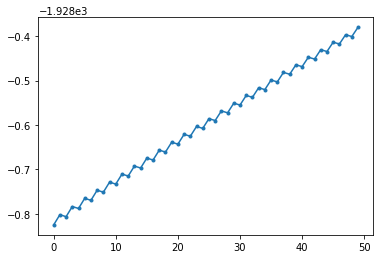

In [34]:
plt.plot(log_likelihoods_new_list[0:50], marker='.')
plt.show()